# Preprocessing overview

This notebook performs the following preprocessing steps for the dataset:

1. Load the combined dataset from `../data/dataset_combined_pretranslation_taba.csv`.
2. Inspect language distribution and count unique languages.
3. Filter to a set of western languages using the `keep_langs` set.
4. Save the filtered (west-only) dataset to `../data/west_dataset.csv`.
5. Exclude English entries, split the remaining data into two parts for translation, and save to `../data/translate_part1.csv` and `../data/translate_part2.csv`.
6. Visualize language counts to confirm the distribution after filtering.

Notes: Modify the `keep_langs` set to include or exclude languages, and adjust the split method if you prefer stratified sampling rather than a simple half/half split.

## Load dataset and inspect language distribution

This cell loads the combined dataset into a pandas DataFrame `df` and prints the counts of each language..

In [2]:
import pandas as pd
df = pd.read_csv("../data/dataset_combined_pretranslation_taba.csv") 

lang_counts = df["language"].value_counts(dropna=False)

print(lang_counts)

zh    352078
ja     59382
en     58184
id     30188
es     22557
fa     15979
pt     12072
ko      4138
tr      3086
it      2138
ar      1724
fr      1663
uk       850
ru       819
nl       804
de       766
hi       489
ms       315
pl       158
la        50
ur        20
mr        20
tl        16
ta        12
th        10
jv         7
ne         7
ca         4
an         4
sv         2
el         2
sw         1
sq         1
lb         1
eu         1
vi         1
cs         1
is         1
gl         1
Name: language, dtype: int64


## Count unique languages

This small cell computes the number of unique language labels in the dataset and prints it

In [3]:
num_languages = df["language"].nunique()
print(num_languages)

39


# Filter to European only languages and remove small/irrelevant groups

Below we define `keep_langs`, a set of language codes that we consider part of the 'European' group for this study. The code filters `df` to these languages and prints the resulting distribution and total count.

In [4]:
keep_langs = {"en","es","pt","tr","it","fr","uk","ru","nl","de","pl"} #11 languages

# Keep only European languages
df_euro = df[df["language"].isin(keep_langs)].copy()

print("Languages remaining:")
print(df_euro["language"].value_counts())

total_instances = len(df_euro)
print("Total instances in European languages:", total_instances)

Languages remaining:
en    58184
es    22557
pt    12072
tr     3086
it     2138
fr     1663
uk      850
ru      819
nl      804
de      766
pl      158
Name: language, dtype: int64
Total instances in European languages: 103097


## Save filtered dataset

In [5]:
df_euro.to_csv("../data/european_dataset.csv", index=False)

## Visualize language counts

This cell shows a bar chart visualisation of the number of medias per language in `df_euro`. It helps to visually inspect whether the distribution looks balanced or dominated by a particular language.

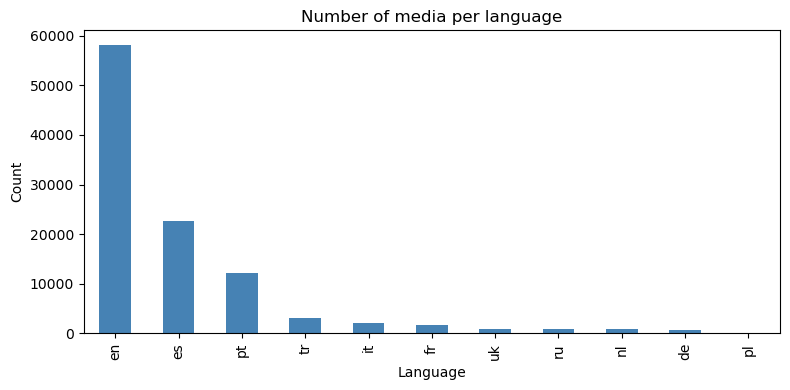

In [6]:
#visualisation
import matplotlib.pyplot as plt

lang_counts = df_euro["language"].value_counts()

ax = lang_counts.plot(kind="bar", figsize=(8, 4), color="steelblue")
ax.set_xlabel("Language")
ax.set_ylabel("Count")
ax.set_title("Number of media per language")
plt.tight_layout()
plt.show()


## Prepare translation subsets (exclude English)

Reload `european_dataset.csv` and remove English rows to create `df_no_english`. We print the remaining language counts to verify the removal was successful.

In [7]:
import pandas as pd

# load west-only dataset
df_euro = pd.read_csv("../data/european_dataset.csv")

# exclude English
df_no_english = df_euro[df_euro["language"] != "en"].copy()
print("Languages after removing English:")
print(df_no_english["language"].value_counts())


Languages after removing English:
es    22557
pt    12072
tr     3086
it     2138
fr     1663
uk      850
ru      819
nl      804
de      766
pl      158
Name: language, dtype: int64


## Split dataset into two parts equally for translation

This cell splits `df_no_english` into two roughly equal parts (`df_part1`, `df_part2`) using a simple half/half index split.

In [8]:
import math

n = len(df_no_english)
half = n // 2

# first gets half, second gets the rest
df_part1 = df_no_english.iloc[:half].copy()
df_part2 = df_no_english.iloc[half:].copy()

print(len(df_part1), len(df_part2))

22456 22457


## Save translation parts to CSV

Save the two parts to `../data/translate_part1.csv` and `../data/translate_part2.csv` for  translation.

In [9]:
df_part1.to_csv("../data/translate_part1.csv", index=False)
df_part2.to_csv("../data/translate_part2.csv", index=False)